In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


## Generar distribuciones estándar en 1D

In [9]:
n = 2000

Z = np.random.normal(loc=0.,  scale=1.,  size=n)   # normal estándar

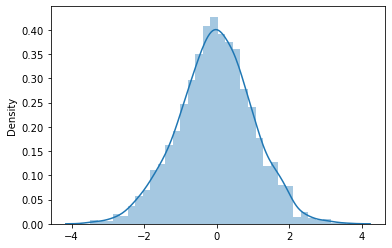

In [10]:
plt.figure()
sns.distplot(Z, kde=True)
plt.show()

In [11]:
Z.mean()

-0.027820771839249556

In [12]:
Z.var()

1.0656030856173944

In [13]:
mu = 5000000
sigma = 10000

In [14]:
X = mu + np.sqrt(sigma)*Z      # transformar a N(mu, sigma)

In [15]:
X[:20]

array([4999925.81809073, 4999878.63342891, 4999998.21069767,
       5000007.03618642, 5000096.63991557, 5000130.34781374,
       4999916.6077421 , 4999862.80514992, 4999790.00742941,
       5000179.3461836 , 4999735.76467898, 4999938.3218363 ,
       5000106.22256275, 5000111.93631549, 4999949.17555441,
       4999995.05440677, 4999956.6095315 , 4999950.11246565,
       5000032.62556175, 5000063.56204331])

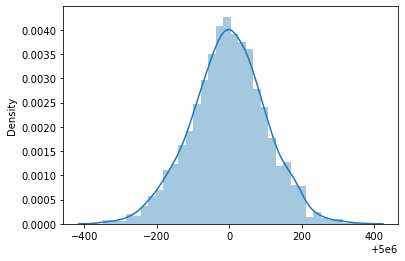

In [16]:
plt.figure()
sns.distplot(X, kde=True)
plt.show()

In [17]:
X.mean()

4999997.217922815

In [18]:
X.var()

10656.030856173227

In [19]:
Y = np.random.normal(loc=mu, scale=np.sqrt(sigma), size=n)

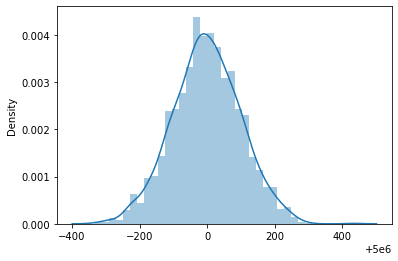

In [20]:
plt.figure()
sns.distplot(Y, kde=True)
plt.show()

In [21]:
print(Y.mean(), Y.var())

4999998.522235583 10170.382768820196


## 2D

In [22]:
n = 500

z1 = np.random.normal(loc=0., scale=1., size=n)
z2 = np.random.normal(loc=0., scale=1., size=n)

In [23]:
Z = np.vstack([z1, z2]).T
Z.shape

(500, 2)

In [25]:
#Z

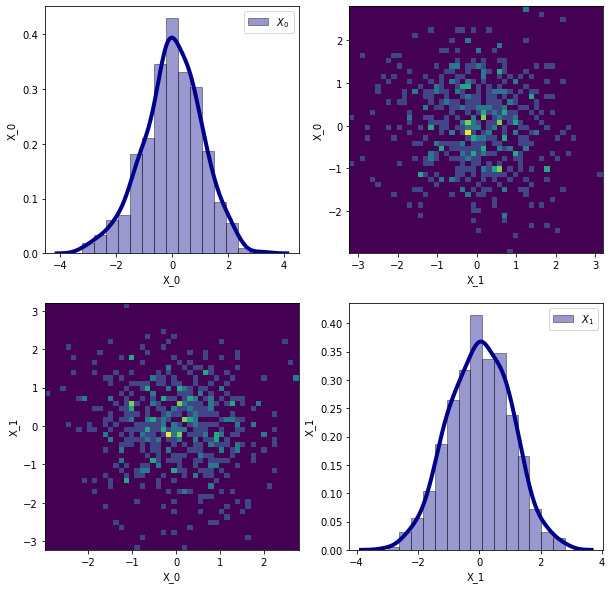

In [26]:
b = 48
plt.figure(figsize=(10,10))
for i in range(0, 2):
    for j in range(0, 2):
        plt.subplot(2, 2, 2*i+j+1)
        if (i == j):
            sns.distplot(Z[:,i], hist=True, kde=True, bins=15, color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='$X_{}$'.format(i))
            plt.legend()
        else:
            plt.hist2d(Z[:,i], Z[:,j], bins=(b,b))
        plt.xlabel('X_{}'.format(j)), plt.ylabel('X_{}'.format(i))
plt.show()

In [57]:
mu = np.array([5, -1.])

Sigma = np.array([[6., 0], [0, 18.]])

In [58]:
mu

array([ 5., -1.])

In [59]:
Sigma   # covarianza

array([[ 6.,  0.],
       [ 0., 18.]])

In [60]:
U, S, V = np.linalg.svd(Sigma)

In [61]:
print(U)
print('')
print(S)
print('')
print(V)

[[0. 1.]
 [1. 0.]]

[18.  6.]

[[0. 1.]
 [1. 0.]]


In [62]:
np.diag(S)

array([[18.,  0.],
       [ 0.,  6.]])

In [63]:
W = np.diag(np.sqrt(S)) @ V
W

array([[0.        , 4.24264069],
       [2.44948974, 0.        ]])

In [64]:
# transformacion de datos

X = mu + Z @ W      # np.dot  = @

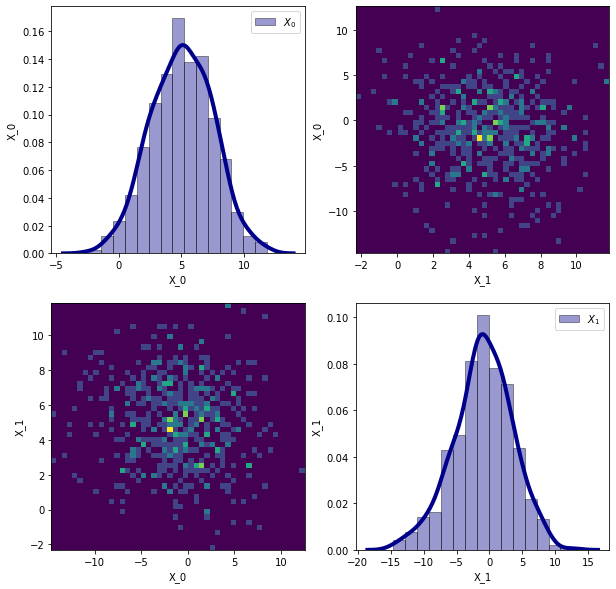

In [67]:
b = 48
plt.figure(figsize=(10,10))
for i in range(0, 2):
    for j in range(0, 2):
        plt.subplot(2, 2, 2*i+j+1)
        if (i == j):
            sns.distplot(X[:,i], hist=True, kde=True, bins=15, color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='$X_{}$'.format(i))
            plt.legend()
        else:
            plt.hist2d(X[:,i], X[:,j], bins=(b,b))
            #plt.xlim([-10,10])
            #plt.ylim([-10,10])
        plt.xlabel('X_{}'.format(j)), plt.ylabel('X_{}'.format(i))
plt.show()

In [37]:
mu

array([ 5., -1.])

In [68]:
n = 500

z1 = np.random.normal(loc=0., scale=1., size=n)
z2 = np.random.normal(loc=0., scale=1., size=n)
z3 = np.random.normal(loc=0., scale=1., size=n)

In [69]:
Z = np.vstack([z1,z2,z3]).T
Z.shape

(500, 3)

In [70]:
dataZ = pd.DataFrame(data=Z, columns=['x1', 'x2', 'x3'])

In [71]:
dataZ

,x1,x2,x3
0,0.871563,-0.444421,-0.571456
1,0.192465,-0.606728,1.228228
2,0.044060,0.155367,-0.503224
3,-0.614883,-0.710915,0.876526
4,-0.529016,-0.600001,-1.409494
...,...,...,...
495,0.237868,-1.066351,1.469614
496,0.794532,-0.869380,0.051465
497,-0.547253,1.291732,-0.245465
498,1.027481,1.578765,-1.798496


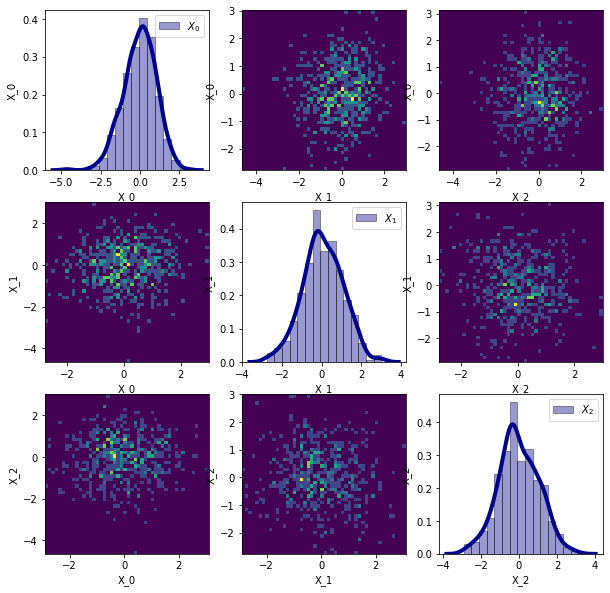

In [72]:
b = 48
plt.figure(figsize=(10,10))
for i in range(0, 3):
    for j in range(0, 3):
        plt.subplot(3, 3, 3*i+j+1)
        if (i == j):
            sns.distplot(Z[:,i], hist=True, kde=True, bins=15, color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='$X_{}$'.format(i))
            plt.legend()
        else:
            plt.hist2d(Z[:,i], Z[:,j], bins=(b,b))
        plt.xlabel('X_{}'.format(j)), plt.ylabel('X_{}'.format(i))
plt.show()

In [ ]:
sns.pairplot(dataZ, diag_kind='kde')

In [73]:
Sigma = np.array([[1., -0.6, 0.2], [-0.6, 1., 0.4], [0.2, 0.4, 1]])
Sigma

array([[ 1. , -0.6,  0.2],
       [-0.6,  1. ,  0.4],
       [ 0.2,  0.4,  1. ]])

In [74]:
U, S, V = np.linalg.svd(Sigma)

In [75]:
print(U)
print('')
print(S)     # todas las entradas de S deben ser positivas !!!!
print('')
print(V)

[[-0.61083416 -0.52479421 -0.5928513 ]
 [ 0.74306868 -0.12144657 -0.65810309]
 [ 0.27336893 -0.84252108  0.46414185]]

[1.64038236 1.18223576 0.17738188]

[[-0.61083416  0.74306868  0.27336893]
 [-0.52479421 -0.12144657 -0.84252108]
 [-0.5928513  -0.65810309  0.46414185]]


In [76]:
W = np.diag(np.sqrt(S)) @ V
print(W)

[[-0.78234059  0.95170313  0.35012385]
 [-0.57061223 -0.13204967 -0.91607878]
 [-0.24968957 -0.27717149  0.19548136]]


In [77]:
X = 0 + Z @ W

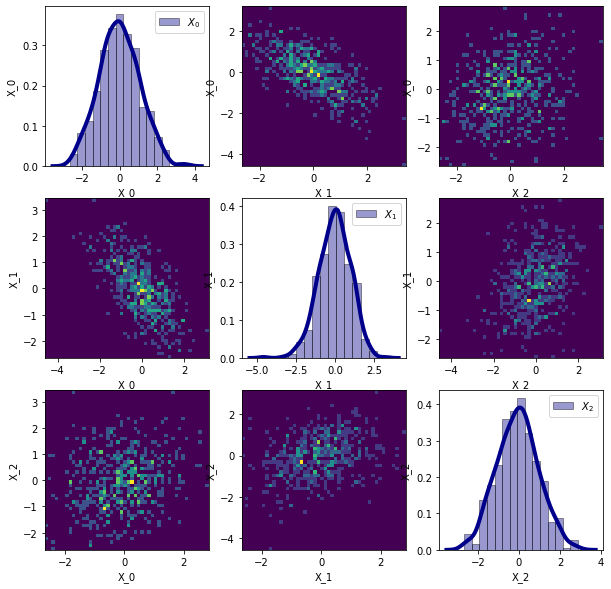

In [78]:
b = 48
plt.figure(figsize=(10,10))
for i in range(0, 3):
    for j in range(0, 3):
        plt.subplot(3, 3, 3*i+j+1)
        if (i == j):
            sns.distplot(X[:,i], hist=True, kde=True, bins=15, color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='$X_{}$'.format(i))
            plt.legend()
        else:
            plt.hist2d(X[:,i], X[:,j], bins=(b,b))
        plt.xlabel('X_{}'.format(j)), plt.ylabel('X_{}'.format(i))
plt.show()

In [ ]:
np.cov(X.T)